<h1>Machine Learning Assignment - Question 2</h1>


<h4>Done by : 

<br>
<br>

Batch Name : BML2 - Bangalore - S2-18 

<br>
<br>

2018AB04159 - Rupesh Mokshagundam
<br>
2018AB04179 - Srinivas Veerabomma
<br>
2018AB04180 - RAJA MAHESH ARAVAPALLI
<br>
</h4>

<h3>Importing Libraries</h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification

<h3>Step-1: Importing the data set from Kaggle</h3>

In [2]:
diabetes_ds = pd.read_csv("diabetes.csv")

<h3>Preview of Dataset</h3>

In [3]:
diabetes_ds.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_ds.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
diabetes_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<h3>Step-2 : Extract X as all columns except the last column and Y as last column</h3>

In [6]:
diabetes_ds.shape

(768, 9)

In [7]:
X = diabetes_ds.iloc[:,:-1].values

In [8]:
X.shape

(768, 8)

In [9]:
y = diabetes_ds.iloc[:,-1:].values

In [10]:
y.shape

(768, 1)

<h3>Step-3: Visualize the dataset</h3>

<h4>Perform the coorelation analysis between the features</h4>

In [11]:
diabetes_ds_correlation = diabetes_ds.corr()
diabetes_ds_correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


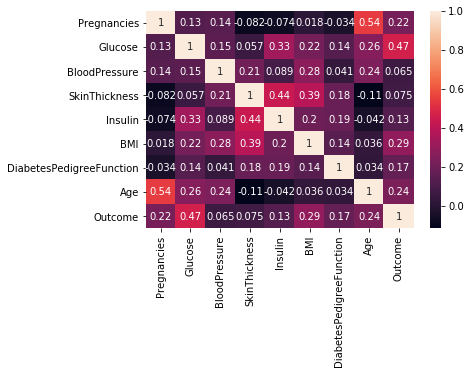

In [12]:
%matplotlib inline
import seaborn as sns
sns.heatmap(diabetes_ds_correlation, annot = True)

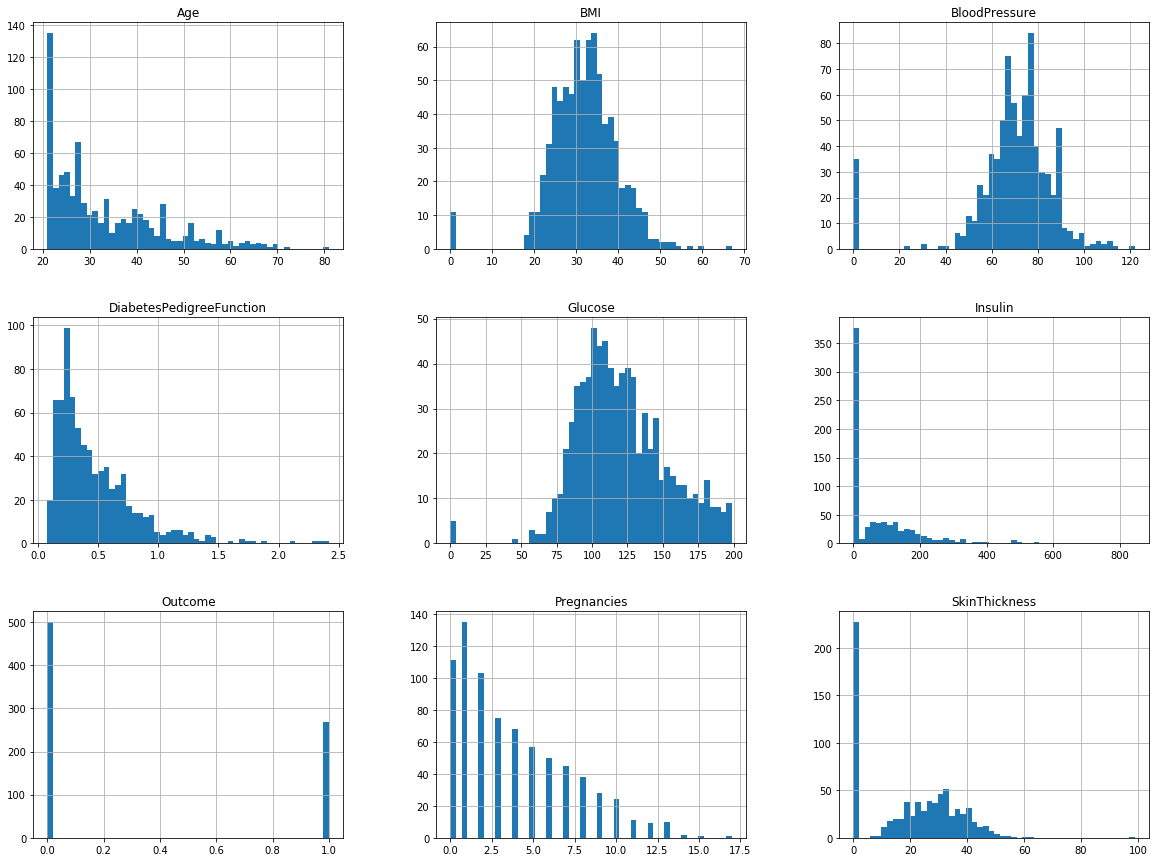

In [13]:
import matplotlib.pyplot as plt
diabetes_ds.hist(bins=50, figsize=(20, 15))
plt.show()

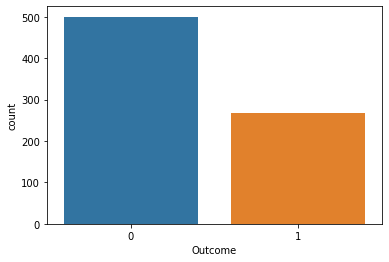

In [14]:
sns.countplot(x='Outcome',data=diabetes_ds)

<h3>Data Preprocessing</h3>

As the following features have lot of ZEROS, we will impute these ZERO values with the median values to preprocess the data so that model accuracy will be increased. The features with ZERO values :

<b>
Glucose	 
BloodPressure	
SkinThickness	
Insulin	
BMI
</b>

In [15]:
median_Glucose = diabetes_ds['Glucose'].median()
diabetes_ds['Glucose'] = diabetes_ds['Glucose'].replace(to_replace=0, value=median_Glucose)

In [16]:
median_BloodPressure = diabetes_ds['BloodPressure'].median()
diabetes_ds['BloodPressure'] = diabetes_ds['BloodPressure'].replace(to_replace=0, value=median_BloodPressure)

In [17]:
median_SkinThickness = diabetes_ds['SkinThickness'].median()
diabetes_ds['SkinThickness'] = diabetes_ds['SkinThickness'].replace(to_replace=0, value=median_SkinThickness)

In [18]:
median_Insulin = diabetes_ds['Insulin'].median()
diabetes_ds['Insulin'] = diabetes_ds['Insulin'].replace(to_replace=0, value=median_Insulin)

In [19]:
median_BMI = diabetes_ds['BMI'].median()
diabetes_ds['BMI'] = diabetes_ds['BMI'].replace(to_replace=0, value=median_BMI)

<h3>Step-4: Split the data into training set and testing set</h3>

In [20]:
# repopulating X and y vectors after feature scaling

X = diabetes_ds.iloc[:,:-1].values
y = diabetes_ds.iloc[:,-1:].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=0)

from sklearn.preprocessing import MinMaxScaler as Scaler

scaler = Scaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

<h3>Step-5: Train a Logistic regression model for the dataset</h3>

C:\Users\srini\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\srini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


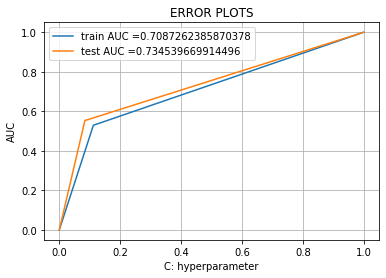

In [21]:
from sklearn.linear_model import LogisticRegression
#create an instance and fit the model 
logmodel = LogisticRegression()
clf = logmodel.fit(X_train, y_train)

from sklearn.metrics import roc_curve, auc

y_train_pred = []
y_test_pred = []

y_train_pred.extend(logmodel.predict(X_train))   
y_test_pred.extend(logmodel.predict(X_test))

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [22]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

<h3>Step-6: Display the coefficients and form the logistic regression equation</h3>

In [23]:
#predictions
Predictions = logmodel.predict(X_test)

In [24]:
Predictions

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [25]:
clf.coef_

array([[ 1.05656578,  3.89503804, -0.8206969 ,  0.17814871, -0.27076446,
         2.59197649,  1.1067605 ,  0.96266326]])

<h3>Step-7: Compute the accuracy and confusion matrix</h3>

In [26]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, Predictions)
print(acc * 100)

80.51948051948052


In [27]:
X_train.shape

(614, 8)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.47013920071845533 for threshold 1


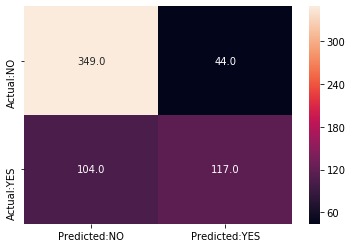

In [28]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
cf = confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
df = pd.DataFrame(cf, index=['Actual:NO','Actual:YES'], columns=['Predicted:NO','Predicted:YES'])
sns.heatmap(df,annot=True, fmt=".1f")


In [29]:
X_test.shape

(154, 8)

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.506661364088288 for threshold 1


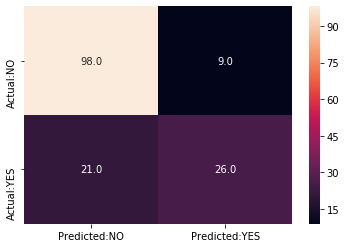

In [30]:
print("Test confusion matrix")
cf = confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr))
df = pd.DataFrame(cf, index=['Actual:NO','Actual:YES'], columns=['Predicted:NO','Predicted:YES'])
sns.heatmap(df,annot=True,fmt=".1f")

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,Predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       107
           1       0.74      0.55      0.63        47

    accuracy                           0.81       154
   macro avg       0.78      0.73      0.75       154
weighted avg       0.80      0.81      0.80       154



<h3>Step-8: Plot the decision boundary</h3>

In [32]:
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
points_x=[x/10. for x in range(-50,+50)]

line_bias = clf.intercept_
line_w = clf.coef_.T
points_y=[(line_w[0]*x+line_bias)/(-1*line_w[1]) for x in points_x]
plt.plot(points_x, points_y)

plt.scatter(X[:,0], X[:,1],c=y)

plt.show()

<h3>Step-9: Identify which of the following variables are positively associated with the target column</h3>

<font color='blue'>
<h4>Answer : </h4>
</font>

Based on the coeffients that were generated in the above model, we can say the following features are positively associated with the target variable :

</n>

<font color='blue'>
<b>
Pregnancies (1.05656578)	
Glucose (3.89503804)	
BMI (2.59197649)	
DiabetesPedigreeFunction (1.1067605)	
Age (0.96266326)	

</b>
</font>

<h3>Step-10: </h3>

For a woman aged 35 and mother of 2 children, by how much does the probability of diabetes increase,
if her bmi was 35 instead of 24 according to the model?

Solution:

As per the model, for a woman aged 35 years and mother of 2 children, the diabetes score when the BMI was 24 is :

24 * 2.59197649 = 62.20743576

For the same woman, the score will be when the BMI is 35 :

35 * 2.59197649 = 90.71917715

so the probability of diabetes increase is : 

(90.71917715 - 62.20743576)/ 62.20743576 = 45.83% 



